### Importing Packages

In [1]:
import pandas as pd  
import numpy as np   
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

D:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.preprocessing import StandardScaler

### Extracting training data

In [3]:
KC_train = pd.read_csv("D:\\Praxis\\ML\\data\\kc-house-data\\wk3_kc_house_train_data.csv")

### zip code dummy variable creation

In [4]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
zip_dummies = lb.fit_transform(KC_train['zipcode'])
# you need to convert this back to a dataframe
zip_dum_df = pd.DataFrame(zip_dummies,columns=lb.classes_)

In [5]:
for i in zip_dum_df.columns:
    KC_train[str(i)] = zip_dum_df[i]

### Checking for missing values

In [6]:
miss = KC_train.isnull().sum()
miss

id           0
date         0
price        0
bedrooms     0
bathrooms    0
            ..
98177        0
98178        0
98188        0
98198        0
98199        0
Length: 91, dtype: int64

### Log transform on sqft_living

In [7]:
KC_train['log_sqft_living'] = np.log(KC_train['sqft_living'])
KC_train=KC_train.drop(["id","date","sqft_living","yr_built"],axis=1)

### Dropping id and date columns

In [9]:
#KC_train=KC_train.drop(["id","date"],axis=1)

### Setting X and Y

In [10]:
Y_train = KC_train["price"].values
y_train = np.log(Y_train)

### Removing variables which are not significant and target variable

In [27]:
removing_variable_list = ['price']

In [28]:
X_train = KC_train[list(set(KC_train.columns) - set(removing_variable_list))]

In [29]:
X_train.shape[1]

87

In [30]:
X_train.values

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Standardising data

In [31]:
X_train=StandardScaler().fit_transform(X_train)
X_train

array([[ 8.6409876 , -0.09966317, -0.11296895, ..., -0.14791969,
        -0.31482136, -0.07527681],
       [-0.11572751, -0.09966317, -0.11296895, ..., -0.14791969,
        -0.31482136, -0.07527681],
       [-0.11572751, -0.09966317, -0.11296895, ..., -0.14791969,
        -0.31482136, -0.07527681],
       ...,
       [ 8.6409876 , -0.09966317, -0.11296895, ..., -0.14791969,
        -0.31482136, -0.07527681],
       [-0.11572751, -0.09966317, -0.11296895, ..., -0.14791969,
        -0.31482136, -0.07527681],
       [-0.11572751, -0.09966317, -0.11296895, ..., -0.14791969,
        -0.31482136, -0.07527681]])

### Fitting LR model

In [32]:
regressor = LinearRegression()
model = regressor.fit(X_train,y_train)
print("train Accuracy",regressor.score(X_train,y_train))

train Accuracy 0.8878170378059811


In [33]:
y_pred1 = regressor.predict(X_train)

### Taking antilog of prediction

In [34]:
predictions1 = np.exp(y_pred1)

In [18]:
print('Mean Absolute Error:', metrics.mean_absolute_error(KC_train[['price']].values, predictions1))
print('Mean Squared Error:', metrics.mean_squared_error(KC_train[['price']].values, predictions1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(KC_train[['price']].values, predictions1)))

Mean Absolute Error: 76375.95801452245
Mean Squared Error: 19588562013.22824
Root Mean Squared Error: 139959.1440857947


### Results

In [35]:
print("Train Results")

print("R squared",regressor.score(X_train,y_train))

R_sq = regressor.score(X_train,y_train)

aj_rsq = 1 - ((1 - (R_sq*R_sq)) * ((X_train.shape[0] - 1)/(X_train.shape[0] - X_train.shape[1] - 1)))

print("Adjusted R squared is {}".format(aj_rsq))              
              
y_pred1 = regressor.predict(X_train)
predictions2 = np.exp(y_pred1)

print('Mean Absolute Error:', metrics.mean_absolute_error(KC_train[['price']].values, predictions1))
print('Mean Squared Error:', metrics.mean_squared_error(KC_train[['price']].values, predictions1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(KC_train[['price']].values, predictions1)))

Train Results
R squared 0.8878170378059811
Adjusted R squared is 0.7863143124116
Mean Absolute Error: 73450.30741997383
Mean Squared Error: 16360134129.365555
Root Mean Squared Error: 127906.73996848468


In [44]:
KC_train.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       '98001', '98002', '98003', '98004', '98005', '98006', '98007', '98008',
       '98010', '98011', '98014', '98019', '98022', '98023', '98024', '98027',
       '98028', '98029', '98030', '98031', '98032', '98033', '98034', '98038',
       '98039', '98040', '98042', '98045', '98052', '98053', '98055', '98056',
       '98058', '98059', '98065', '98070', '98072', '98074', '98075', '98077',
       '98092', '98102', '98103', '98105', '98106', '98107', '98108', '98109',
       '98112', '98115', '98116', '98117', '98118', '98119', '98122', '98125',
       '98126', '98133', '98136', '98144', '98146', '98148', '98155', '98166',
       '98168', '98177', '98178', '98188', '98198', '98199',
       'log_sqft_living'],
      dtype='object')

### Coefficients

X_test_columns =KC_test.drop(["price"],axis=1)
x = regressor.coef_
coeff_dict = {}
count = 0
for i in X_test_columns.columns:
    coeff_dict[i] = x[count]
    count = count + 1
df = pd.DataFrame(coeff_dict.items(),columns=['Attribute', 'Coefficient'])
df

In [128]:
removing_variable_list = ['price','zipcode','bedrooms', 'bathrooms', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement','sqft_living15', 'condition', 'yr_renovated',
        'zipcode', 'lat', 'long', 'sqft_lot15']

### Train fitting in single cell

In [129]:
KC_train = pd.read_csv("D:\\Praxis\\ML\\data\\kc-house-data\\wk3_kc_house_train_data.csv")

KC_train.loc[KC_train.bedrooms == 33, 'bedrooms'] = 3

from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
zip_dummies = lb.fit_transform(KC_train['zipcode'])
# you need to convert this back to a dataframe
zip_dum_df = pd.DataFrame(zip_dummies,columns=lb.classes_)

for i in zip_dum_df.columns:
    KC_train[str(i)] = zip_dum_df[i]

#for i in KC_train.id:
#    KC_train.loc[(KC_train['id']==i) & (KC_train['yr_renovated']==0),'yr_renovated'] = KC_train.loc[(KC_train['id']==i),'yr_built'].values[0]
    
#KC_train.loc[KC_train['yr_renovated'] == 0 , 'renovation_index'] = 1
#KC_train.loc[KC_train['yr_renovated'] > 0 , 'renovation_index'] = 2
#KC_train.loc[KC_train['yr_renovated'] > 1970 , 'renovation_index'] = 3
#KC_train.loc[KC_train['yr_renovated'] > 1995 , 'renovation_index'] = 4 

#KC_train.loc[KC_train['yr_renovated'] == 0 , 'yr_renovated'] = 1


KC_train['log_sqft_living'] = np.log(KC_train['sqft_living'])

#KC_train['log_sqft_living15'] = np.log(KC_train['sqft_living15'])


KC_train=KC_train.drop(["id","date","sqft_living","yr_built"],axis=1)

Y_train = KC_train["price"].values
y_train = np.log(Y_train)

X_train = KC_train[list(set(KC_train.columns) - set(removing_variable_list))].values

X_train=StandardScaler().fit_transform(X_train)

regressor = LinearRegression()
model = regressor.fit(X_train,y_train)

print("Train Results")

print("R squared",regressor.score(X_train,y_train))

R_sq = regressor.score(X_train,y_train)

aj_rsq = 1 - ((1 - (R_sq*R_sq)) * ((X_train.shape[0] - 1)/(X_train.shape[0] - X_train.shape[1] - 1)))
print("Adjusted R squared is {}".format(aj_rsq))

y_pred1 = regressor.predict(X_train)
predictions2 = np.exp(y_pred1)

print('Mean Absolute Error:', metrics.mean_absolute_error(KC_train[['price']].values, predictions1))
print('Mean Squared Error:', metrics.mean_squared_error(KC_train[['price']].values, predictions1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(KC_train[['price']].values, predictions1)))

Train Results
R squared 0.8709331414397495
Adjusted R squared is 0.7566796902472808
Mean Absolute Error: 73450.30741997383
Mean Squared Error: 16360134129.365555
Root Mean Squared Error: 127906.73996848468


### Using validation data

In [130]:
KC_valid = pd.read_csv("D:\\Praxis\\ML\\data\\kc-house-data\\wk3_kc_house_valid_data.csv")

from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
zip_dummies = lb.fit_transform(KC_valid['zipcode'])
# you need to convert this back to a dataframe
zip_dum_df = pd.DataFrame(zip_dummies,columns=lb.classes_)

for i in zip_dum_df.columns:
    KC_valid[str(i)] = zip_dum_df[i]

#KC_valid.loc[KC_valid['yr_renovated'] == 0 , 'renovation_index'] = 1
#KC_valid.loc[KC_valid['yr_renovated'] > 0 , 'renovation_index'] = 2
#KC_valid.loc[KC_valid['yr_renovated'] > 1970 , 'renovation_index'] = 3
#KC_valid.loc[KC_valid['yr_renovated'] > 1995 , 'renovation_index'] = 4

#for i in KC_valid.id:
#    KC_valid.loc[(KC_valid['id']==i) & (KC_valid['yr_renovated']==0),'yr_renovated'] = KC_valid.loc[(KC_valid['id']==i),'yr_built'].values[0]
        

KC_valid['log_sqft_living'] = np.log(KC_valid['sqft_living'])

KC_valid=KC_valid.drop(["id","date","sqft_living"],axis=1)

Y_valid = KC_valid["price"].values
y_valid = np.log(Y_valid)

X_valid = KC_valid[list(set(KC_valid.columns) - set(removing_variable_list))].values

X_valid=StandardScaler().fit_transform(X_valid)

regressor = LinearRegression()
model = regressor.fit(X_valid,y_valid)

print("Validation Results")

print("R squared",regressor.score(X_valid,y_valid))

R_sq = regressor.score(X_valid,y_valid)

aj_rsq = 1 - ((1 - (R_sq*R_sq)) * ((X_valid.shape[0] - 1)/(X_valid.shape[0] - X_valid.shape[1] - 1)))
print("Adjusted R squared is {}".format(aj_rsq))

y_pred2 = regressor.predict(X_valid)
predictions2 = np.exp(y_pred2)


print('Mean Absolute Error:', metrics.mean_absolute_error(KC_valid[['price']].values, predictions2))
print('Mean Squared Error:', metrics.mean_squared_error(KC_valid[['price']].values, predictions2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(KC_valid[['price']].values, predictions2)))

Validation Results
R squared 0.8655035256086329
Adjusted R squared is 0.7471277605680446
Mean Absolute Error: 75923.8369324647
Mean Squared Error: 16432644399.149004
Root Mean Squared Error: 128189.87635203103


### Taking a sample of validation data and visualising results

In [ ]:
df = pd.DataFrame({'Actual': KC_valid[['price']].values.flatten(), 'Predicted': predictions2.flatten()})
df1 = df.sample(50)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Using test data

In [132]:
KC_test = pd.read_csv("D:\\Praxis\\ML\\data\\kc-house-data\\wk3_kc_house_test_data.csv")

from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
zip_dummies = lb.fit_transform(KC_test['zipcode'])
# you need to convert this back to a dataframe
zip_dum_df = pd.DataFrame(zip_dummies,columns=lb.classes_)

for i in zip_dum_df.columns:
    KC_test[str(i)] = zip_dum_df[i]
    
#KC_test.loc[KC_test['yr_renovated'] == 0 , 'renovation_index'] = 1
#KC_test.loc[KC_test['yr_renovated'] > 0 , 'renovation_index'] = 2
#KC_test.loc[KC_test['yr_renovated'] > 1970 , 'renovation_index'] = 3
#KC_test.loc[KC_test['yr_renovated'] > 1995 , 'renovation_index'] = 4    

#for i in KC_test.id:
 #   KC_test.loc[(KC_test['id']==i) & (KC_test['yr_renovated']==0),'yr_renovated'] = KC_test.loc[(KC_test['id']==i),'yr_built'].values[0]
        

KC_test['log_sqft_living'] = np.log(KC_test['sqft_living'])    
    
KC_test=KC_test.drop(["id","date","sqft_living"],axis=1)

Y_test = KC_test["price"].values
y_test = np.log(Y_test)

X_test = KC_test[list(set(KC_test.columns) - set(removing_variable_list))].values

X_test=StandardScaler().fit_transform(X_test)

regressor = LinearRegression()
model = regressor.fit(X_test,y_test)
print("valid Accuracy",regressor.score(X_test,y_test))

R_sq = regressor.score(X_test,y_test)

aj_rsq = 1 - ((1 - (R_sq*R_sq)) * ((X_test.shape[0] - 1)/(X_test.shape[0] - X_test.shape[1] - 1)))
print("Adjusted R squared is {}".format(aj_rsq))

y_pred3 = regressor.predict(X_test)
predictions3 = np.exp(y_pred3)

print('Mean Absolute Error:', metrics.mean_absolute_error(KC_test[['price']].values, predictions3))
print('Mean Squared Error:', metrics.mean_squared_error(KC_test[['price']].values, predictions3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(KC_test[['price']].values, predictions3)))

valid Accuracy 0.8666598606945849
Adjusted R squared is 0.7423802335975584
Mean Absolute Error: 76996.36771941568
Mean Squared Error: 16751031816.211279
Root Mean Squared Error: 129425.77724785461


### Taking a sample and visualising results

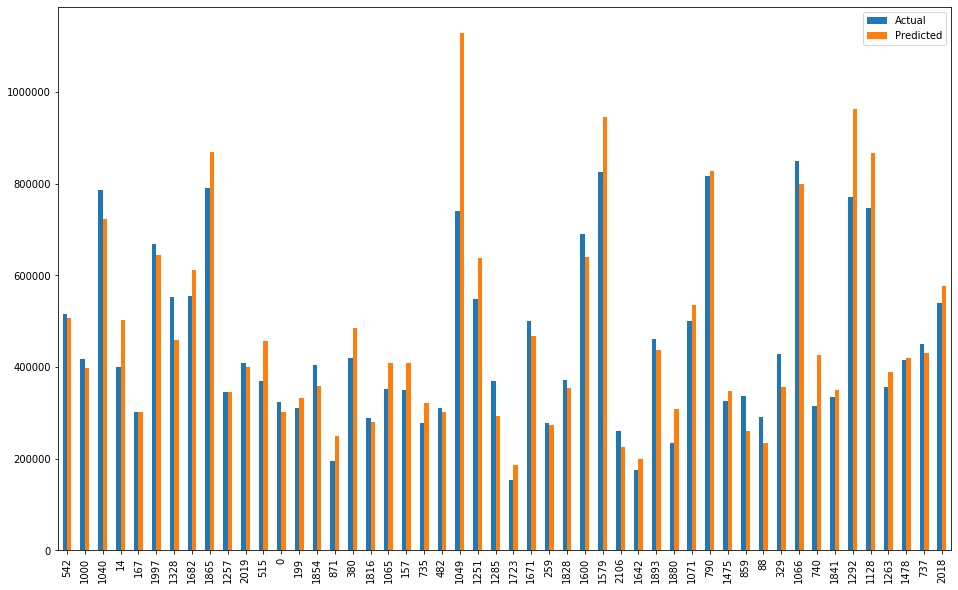

In [173]:
df = pd.DataFrame({'Actual': KC_test[['price']].values.flatten(), 'Predicted': predictions3.flatten()})
df1 = df.sample(50)
plt.rc('xtick', labelsize= 10)     
df1.plot(kind='bar',figsize=(16,10),grid=False)
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.grid(b=None)
plt.show()

In [101]:
data = [['log_sqft_living', 0.47], 
        ['zipcodes', 0.81], 
        ['grade', 0.84],
        ['waterfront', 0.85832],
        ['view', 0.8655],
        ['condition', 0.8671],
        ['yr_renovated', 0.8677]
       ] 
        
df = pd.DataFrame(data, columns = ['Variable', 'R_squared'])
df

,Variable,R_squared
0,log_sqft_living,0.47000
1,zipcodes,0.81000
2,grade,0.84000
3,waterfront,0.85832
4,view,0.86550
5,condition,0.86710
6,yr_renovated,0.86770


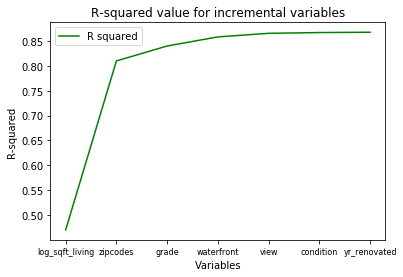

<Figure size 1440x1440 with 0 Axes>

In [119]:
plt.plot(df.Variable, df['R_squared'], color='green',label = 'R squared')
plt.xlabel('Variables',fontsize = 10)
plt.ylabel('R-squared')

plt.rc('xtick', labelsize= 25)     

plt.title('R-squared value for incremental variables')
plt.legend(loc="upper left")
plt.figure(figsize=(20,20))
plt.show()